## 용어
- 검정통계량(test statistic): 관심의 차이 또는 효과에 대한 측정 지표
- t 통계량(t-statistic): 평균과 같이 표준화된 형태의 일반적인 검정통계량
- t 분포(t-distribution): 관측된 t 통계량을 비교할 수 있는, (귀무가설에서 파생된)기준분포

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
session_times = pd.read_csv('../../data/web_page_data.csv')

In [3]:
session_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [4]:
mean_a = session_times[session_times['Page'] == 'Page A']['Time'].mean()
mean_a

1.2633333333333332

In [5]:
mean_b = session_times[session_times['Page'] == 'Page B']['Time'].mean()
mean_b

1.62

## t 검정(t-Tests)

In [6]:
res = stats.ttest_ind(session_times[session_times['Page'] == 'Page A']['Time'],
                     session_times[session_times['Page'] == 'Page B']['Time'],
                     equal_var=False)

print(f'p-value for single sided test: {res.pvalue / 2:.4f}') # 단측 검정 이므로 2를 나눠 준다.

p-value for single sided test: 0.1408


## 순열검정으로 p값 구하기

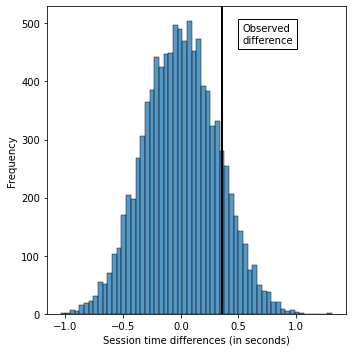

In [7]:
# 순열 검정
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = len(session_times[session_times['Page'] == 'Page A'])
nB = len(session_times[session_times['Page'] == 'Page B'])
perm_diffs = [perm_fun(session_times['Time'], nA, nB) for _ in range(10000)]

fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=perm_diffs, ax=ax)
ax.axvline(x=mean_b-mean_a, color='black', linewidth=2)
ax.text((mean_b-mean_a)*1.5, 500, s='Observed\ndifference', va='top', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# p값 => 순열검정으로 구한 p값과 t 검정으로 구한 p값이 유사하다.
np.mean([diff > (mean_b - mean_a) for diff in perm_diffs])

0.1371